# 카테고리별 추세

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('01_제공데이터_update(210811)/04_음식관련 카드소비_CARD_SPENDING.CSV', encoding='cp949')

In [3]:
df

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-01,서귀포시,50130253,남원읍,C00400,간식,108,1565308
1,2018-01-01,서귀포시,50130253,남원읍,C01200,농축수산물,54,2199680
2,2018-01-01,서귀포시,50130253,남원읍,A00200,마트/슈퍼마켓,466,24828201
3,2018-01-01,서귀포시,50130253,남원읍,C01400,배달,25,644192
4,2018-01-01,서귀포시,50130253,남원읍,C00700,부페,5,294600
...,...,...,...,...,...,...,...,...
544800,2021-06-30,제주시,50110600,화북동,C00300,아시아음식,146,5774943
544801,2021-06-30,제주시,50110600,화북동,C00200,양식,50,1997413
544802,2021-06-30,제주시,50110600,화북동,C00900,주점및주류판매,15,416987
544803,2021-06-30,제주시,50110600,화북동,C00500,패스트푸드,282,4305680


In [4]:
df['base_month'] = df['base_date'].str[:7]

In [5]:
df

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt,base_month
0,2018-01-01,서귀포시,50130253,남원읍,C00400,간식,108,1565308,2018-01
1,2018-01-01,서귀포시,50130253,남원읍,C01200,농축수산물,54,2199680,2018-01
2,2018-01-01,서귀포시,50130253,남원읍,A00200,마트/슈퍼마켓,466,24828201,2018-01
3,2018-01-01,서귀포시,50130253,남원읍,C01400,배달,25,644192,2018-01
4,2018-01-01,서귀포시,50130253,남원읍,C00700,부페,5,294600,2018-01
...,...,...,...,...,...,...,...,...,...
544800,2021-06-30,제주시,50110600,화북동,C00300,아시아음식,146,5774943,2021-06
544801,2021-06-30,제주시,50110600,화북동,C00200,양식,50,1997413,2021-06
544802,2021-06-30,제주시,50110600,화북동,C00900,주점및주류판매,15,416987,2021-06
544803,2021-06-30,제주시,50110600,화북동,C00500,패스트푸드,282,4305680,2021-06


In [6]:
df_month = df.groupby(['base_month', 'mct_cat_nm']).sum()

In [7]:
df_month

use_cnt      use_amt
base_month mct_cat_nm                      
2018-01    간식           272640   3168683747
           농축수산물        100801   6486446458
           마트/슈퍼마켓     1204155  43372633639
           배달            29917    586618998
           부페             2289    172514668
...                        ...          ...
2021-06    아시아음식        126925   4246061912
           양식            53305   1756326724
           주점및주류판매       17412    739915956
           패스트푸드        208638   3233713856
           한식          1230763  35778901024

[462 rows x 2 columns]

In [8]:
df_month.reset_index(inplace=True)

In [9]:
df_month

,base_month,mct_cat_nm,use_cnt,use_amt
0,2018-01,간식,272640,3168683747
1,2018-01,농축수산물,100801,6486446458
2,2018-01,마트/슈퍼마켓,1204155,43372633639
3,2018-01,배달,29917,586618998
4,2018-01,부페,2289,172514668
...,...,...,...,...
457,2021-06,아시아음식,126925,4246061912
458,2021-06,양식,53305,1756326724
459,2021-06,주점및주류판매,17412,739915956
460,2021-06,패스트푸드,208638,3233713856


# 카드 소비 데이터

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = True

## 카테고리별 월단위 총 매출액

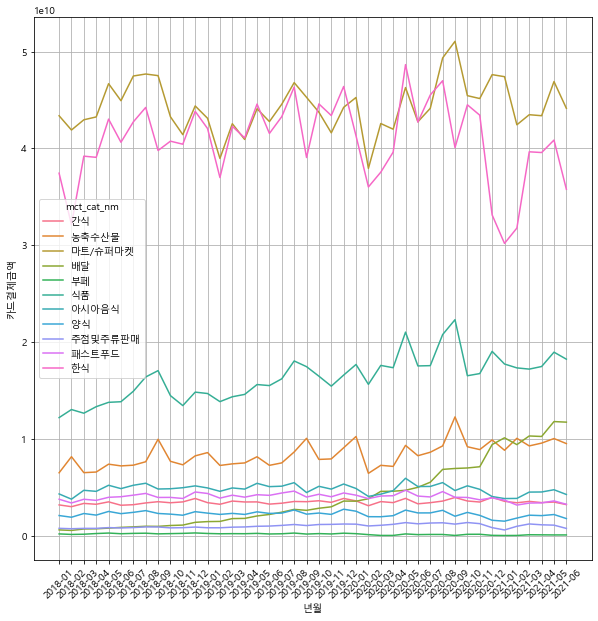

In [11]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1, nrows=1)
sns.lineplot(x='base_month', y='use_amt', data=df_month, hue='mct_cat_nm', ax=ax)
ax.set_xticklabels(df_month['base_month'].unique(), rotation=45)
plt.xlabel('년월')
plt.ylabel('카드결제금액')
plt.grid()
plt.show()

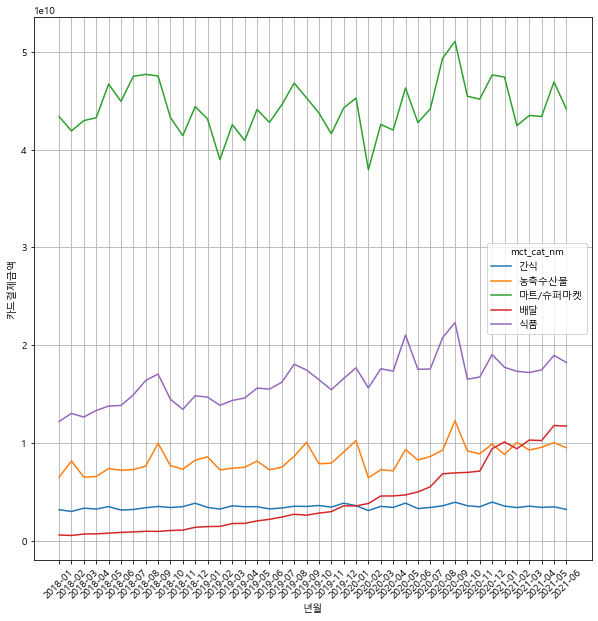

In [12]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1, nrows=1)
sns.lineplot(x='base_month', y='use_amt', data=df_month[df_month['mct_cat_nm'].isin(['식품', '농축수산물', '마트/슈퍼마켓', '배달', '간식'])], hue='mct_cat_nm', ax=ax)
ax.set_xticklabels(df_month['base_month'].unique(), rotation=45)
plt.grid()
plt.xlabel('년월')
plt.ylabel('카드결제금액')
plt.show()

## 카테고리별 월단위 매출액 비율

In [13]:
df_month_rate = df_month.groupby('base_month').sum().reset_index()
df_month_rate.drop(columns=['use_cnt'], inplace=True)
df_month_rate.rename(columns={'use_amt':'월총매출'}, inplace=True)

In [14]:
df_month_all = pd.merge(df_month, df_month_rate, on=['base_month'], how='left')
df_month_all

,base_month,mct_cat_nm,use_cnt,use_amt,월총매출
0,2018-01,간식,272640,3168683747,114292349788
1,2018-01,농축수산물,100801,6486446458,114292349788
2,2018-01,마트/슈퍼마켓,1204155,43372633639,114292349788
3,2018-01,배달,29917,586618998,114292349788
4,2018-01,부페,2289,172514668,114292349788
...,...,...,...,...,...
457,2021-06,아시아음식,126925,4246061912,132608266188
458,2021-06,양식,53305,1756326724,132608266188
459,2021-06,주점및주류판매,17412,739915956,132608266188
460,2021-06,패스트푸드,208638,3233713856,132608266188


In [15]:
df_month_all['월별비율'] = df_month_all['use_amt'] / df_month_all['월총매출']
df_month_all

,base_month,mct_cat_nm,use_cnt,use_amt,월총매출,월별비율
0,2018-01,간식,272640,3168683747,114292349788,0.027724
1,2018-01,농축수산물,100801,6486446458,114292349788,0.056753
2,2018-01,마트/슈퍼마켓,1204155,43372633639,114292349788,0.379489
3,2018-01,배달,29917,586618998,114292349788,0.005133
4,2018-01,부페,2289,172514668,114292349788,0.001509
...,...,...,...,...,...,...
457,2021-06,아시아음식,126925,4246061912,132608266188,0.032020
458,2021-06,양식,53305,1756326724,132608266188,0.013244
459,2021-06,주점및주류판매,17412,739915956,132608266188,0.005580
460,2021-06,패스트푸드,208638,3233713856,132608266188,0.024385


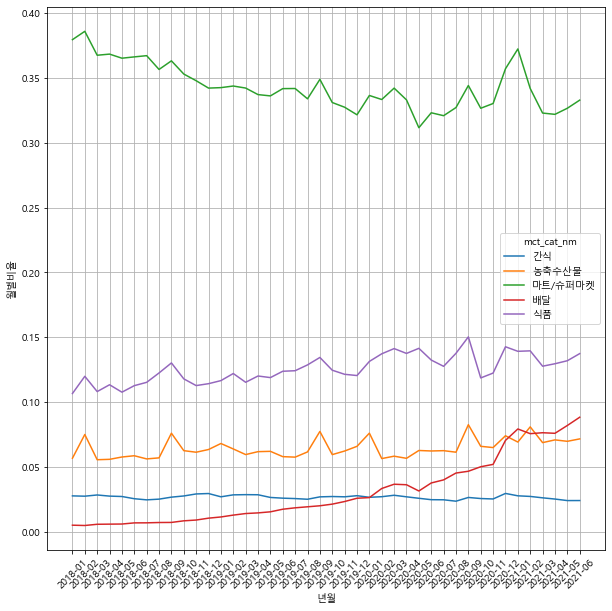

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1, nrows=1)
g = sns.lineplot(x='base_month', y='월별비율', data=df_month_all[df_month_all['mct_cat_nm'].isin(['식품', '농축수산물', '마트/슈퍼마켓', '배달', '간식'])], hue='mct_cat_nm', ax=ax)
ax.set_xticklabels(df_month['base_month'].unique(), rotation=45)
plt.xlabel('년월')
plt.grid()
plt.show()

## 추세 (기울기)

In [17]:
import numpy as np

In [18]:
x = np.arange(0, 42)
d = dict()
for cate in df_month['mct_cat_nm'].unique():
    y = df_month[df_month['mct_cat_nm']==cate]['use_amt']
    poly_fit = np.polyfit(x, y, 1) # (b1, b0) 반환
    d[cate] = poly_fit[0]

val_reverse = sorted(d.items(), reverse=True, key=lambda item: item[1])
for key, value in val_reverse:
    print(f'{key}의 추세 기울기 :', value)

배달의 추세 기울기 : 264380982.0891338
식품의 추세 기울기 : 143445640.0023499
농축수산물의 추세 기울기 : 66021514.097074844
마트/슈퍼마켓의 추세 기울기 : 38078092.83947772
주점및주류판매의 추세 기울기 : 9141019.191232476
간식의 추세 기울기 : 6628156.308808021
부페의 추세 기울기 : -4384633.414147962
아시아음식의 추세 기울기 : -7066410.93825463
양식의 추세 기울기 : -7202260.940442419
패스트푸드의 추세 기울기 : -7394467.626205305
한식의 추세 기울기 : -30057160.12203214


# 음식물 쓰레기 추세

In [19]:
df_trash = pd.read_csv('01_제공데이터_update(210811)/01_음식물쓰레기_FOOD_WASTE_210811_update.CSV', encoding='cp949')

In [20]:
df_trash

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [21]:
df_trash = df_trash.groupby('base_date').sum()

In [22]:
df_trash.reset_index(inplace=True)

In [23]:
df_trash

,base_date,em_cnt,em_g,pay_amt
0,2018-01-01,32512,85755000,2550543
1,2018-01-02,34664,90217650,2681290
2,2018-01-03,31025,80277600,2387761
3,2018-01-04,31540,80138700,2382283
4,2018-01-05,29709,75798600,2253564
...,...,...,...,...
1272,2021-06-26,42717,93151550,2782539
1273,2021-06-27,49087,103777500,3101380
1274,2021-06-28,44871,96764250,2891653
1275,2021-06-29,44170,93479700,2792952


## 일단위 변화

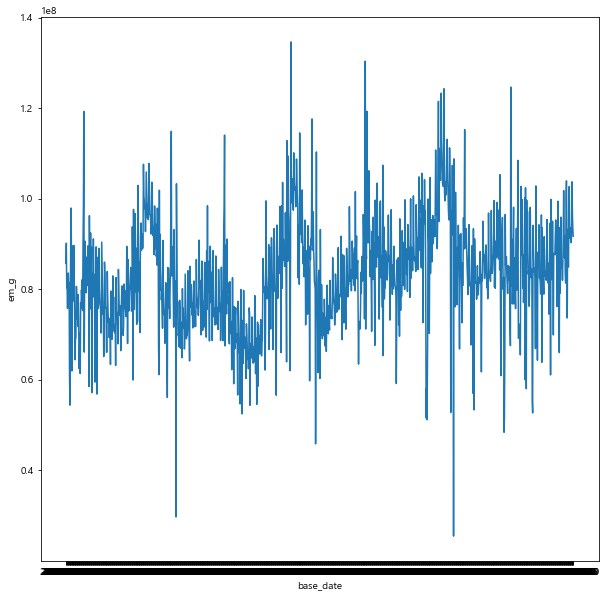

In [24]:
plt.figure(figsize=(10, 10))
sns.lineplot(y='em_g', x='base_date', data=df_trash)
plt.show()

## 월단위 변화

In [25]:
df_trash['month'] = df_trash['base_date'].str[:7]

In [26]:
df_trash_month = df_trash.groupby('month').sum()

In [27]:
df_trash_month.reset_index(inplace=True)

In [28]:
df_trash_month

,month,em_cnt,em_g,pay_amt
0,2018-01,924836,2419027050,71928149
1,2018-02,858521,2245207250,66843783
2,2018-03,964376,2460504700,73206950
3,2018-04,948154,2263294900,67343368
4,2018-05,1046018,2323652300,69148805
5,2018-06,1124374,2439064065,72587305
6,2018-07,1354892,2941837450,87500610
7,2018-08,1297482,2762018600,82142116
8,2018-09,1194576,2405165000,71471339
9,2018-10,1098181,2263879050,67772782


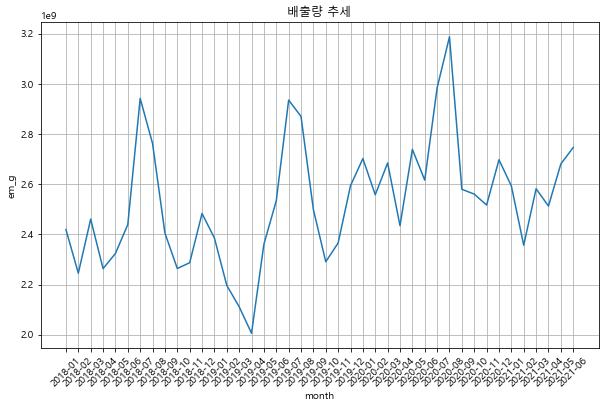

In [29]:
plt.figure(figsize=(10, 6))
g = sns.lineplot(y='em_g', x='month', data=df_trash_month)
plt.xticks(rotation=45)
plt.grid()
plt.title('배출량 추세')
plt.show()

In [30]:
x = np.arange(0, 42)
y = df_trash_month['em_g']
poly_fit = np.polyfit(x, y, 1) # (b1, b0) 반환

print(f'음식물 쓰레기 양 추세 기울기 :', poly_fit[0])

음식물 쓰레기 양 추세 기울기 : 7970683.972287507


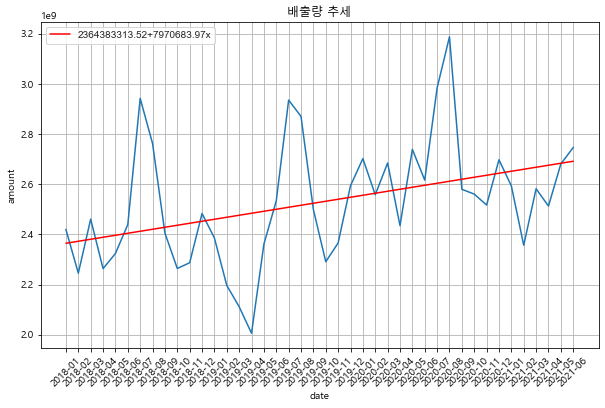

In [48]:
poly_1d = np.poly1d(poly_fit) # y=b1x+b0 함수 생성
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('date')
ax.set_ylabel('amount')
g = sns.lineplot(y='em_g', x='month', data=df_trash_month)
plt.xticks(rotation=45)
plt.grid()
plt.title('배출량 추세')
sns.set_style("ticks",{'axes.grid' : True})
ax.plot(xs, ys, color='red', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.legend()
plt.show()

## 유동인구 및 주거인구로 나눈 음식물 쓰레기 추세

In [32]:
pop_in = pd.read_csv('전체 데이터 통합2.csv', encoding='cp949')

In [33]:
pop_in['month'] = pop_in['base_date'].str[:7]

In [34]:
pop_in = pop_in.groupby('month').sum().reset_index()

In [35]:
pop_in.head()

,month,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,...,평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),내국인거주남성,외국인거주남성,내국인거주여성,외국인거주여성,배출량
0,2018-01,2.107341e+07,1.025825e+07,2.077600e+07,1.149866e+07,2.351271e+07,1.145834e+07,2.475074e+07,1.362454e+07,1.918981e+07,...,78209.1,1169181.5,3838.78,332.0,4796.0,9113969,264833,9039011,244590,2410146150
1,2018-02,1.917391e+07,8.722974e+06,1.912410e+07,8.753427e+06,2.136163e+07,9.711411e+06,2.271155e+07,1.033324e+07,1.768176e+07,...,64255.2,1055792.5,5978.20,418.0,3498.0,8244768,241752,8176560,222740,2237663300
2,2018-03,1.821469e+07,1.042544e+07,1.839126e+07,1.013723e+07,2.028538e+07,1.153335e+07,2.185305e+07,1.192969e+07,1.873384e+07,...,85903.4,1164564.8,9438.53,0.0,2960.0,9143574,269886,9070290,247938,2451217550
3,2018-04,2.085940e+07,8.185286e+06,2.031318e+07,8.262149e+06,2.310788e+07,9.085210e+06,2.398355e+07,9.740808e+06,1.919111e+07,...,78934.9,1109298.3,11518.60,0.0,3106.0,8863680,264360,8790090,240900,2253441550
4,2018-05,2.144532e+07,9.943122e+06,2.078637e+07,1.023596e+07,2.375506e+07,1.108452e+07,2.453734e+07,1.210684e+07,1.978912e+07,...,90995.9,1156398.8,11313.18,0.0,4198.0,9173024,293136,9097198,253332,2313361350


In [36]:
pop_in['float_total'] = pop_in.iloc[:, 1:39].sum(axis=1)

In [37]:
pop_in['resd_total'] = pop_in.iloc[:, -6:-2].sum(axis=1)

In [38]:
pop_in.head()

,month,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,...,합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),내국인거주남성,외국인거주남성,내국인거주여성,외국인거주여성,배출량,float_total,resd_total
0,2018-01,2.107341e+07,1.025825e+07,2.077600e+07,1.149866e+07,2.351271e+07,1.145834e+07,2.475074e+07,1.362454e+07,1.918981e+07,...,3838.78,332.0,4796.0,9113969,264833,9039011,244590,2410146150,6.031963e+08,18662403
1,2018-02,1.917391e+07,8.722974e+06,1.912410e+07,8.753427e+06,2.136163e+07,9.711411e+06,2.271155e+07,1.033324e+07,1.768176e+07,...,5978.20,418.0,3498.0,8244768,241752,8176560,222740,2237663300,5.327551e+08,16885820
2,2018-03,1.821469e+07,1.042544e+07,1.839126e+07,1.013723e+07,2.028538e+07,1.153335e+07,2.185305e+07,1.192969e+07,1.873384e+07,...,9438.53,0.0,2960.0,9143574,269886,9070290,247938,2451217550,5.842565e+08,18731688
3,2018-04,2.085940e+07,8.185286e+06,2.031318e+07,8.262149e+06,2.310788e+07,9.085210e+06,2.398355e+07,9.740808e+06,1.919111e+07,...,11518.60,0.0,3106.0,8863680,264360,8790090,240900,2253441550,5.800350e+08,18159030
4,2018-05,2.144532e+07,9.943122e+06,2.078637e+07,1.023596e+07,2.375506e+07,1.108452e+07,2.453734e+07,1.210684e+07,1.978912e+07,...,11313.18,0.0,4198.0,9173024,293136,9097198,253332,2313361350,5.982813e+08,18816690


In [39]:
pop_in['배출량/유동인구'] = pop_in['배출량'] / pop_in['float_total']
pop_in['배출량/거주인구'] = pop_in['배출량'] / pop_in['resd_total']

In [40]:
pop_in.head()

,month,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,...,평균 전운량(1/10),내국인거주남성,외국인거주남성,내국인거주여성,외국인거주여성,배출량,float_total,resd_total,배출량/유동인구,배출량/거주인구
0,2018-01,2.107341e+07,1.025825e+07,2.077600e+07,1.149866e+07,2.351271e+07,1.145834e+07,2.475074e+07,1.362454e+07,1.918981e+07,...,4796.0,9113969,264833,9039011,244590,2410146150,6.031963e+08,18662403,3.995625,129.144470
1,2018-02,1.917391e+07,8.722974e+06,1.912410e+07,8.753427e+06,2.136163e+07,9.711411e+06,2.271155e+07,1.033324e+07,1.768176e+07,...,3498.0,8244768,241752,8176560,222740,2237663300,5.327551e+08,16885820,4.200172,132.517301
2,2018-03,1.821469e+07,1.042544e+07,1.839126e+07,1.013723e+07,2.028538e+07,1.153335e+07,2.185305e+07,1.192969e+07,1.873384e+07,...,2960.0,9143574,269886,9070290,247938,2451217550,5.842565e+08,18731688,4.195448,130.859405
3,2018-04,2.085940e+07,8.185286e+06,2.031318e+07,8.262149e+06,2.310788e+07,9.085210e+06,2.398355e+07,9.740808e+06,1.919111e+07,...,3106.0,8863680,264360,8790090,240900,2253441550,5.800350e+08,18159030,3.885010,124.094819
4,2018-05,2.144532e+07,9.943122e+06,2.078637e+07,1.023596e+07,2.375506e+07,1.108452e+07,2.453734e+07,1.210684e+07,1.978912e+07,...,4198.0,9173024,293136,9097198,253332,2313361350,5.982813e+08,18816690,3.866679,122.941992


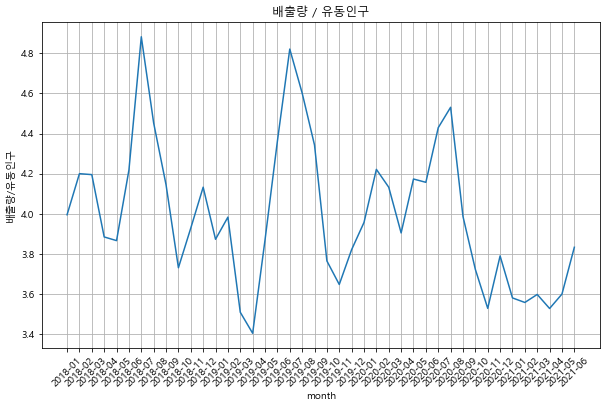

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(y='배출량/유동인구', x='month', data=pop_in)
plt.xticks(rotation=45)
plt.grid()
plt.title('배출량 / 유동인구')
plt.show()

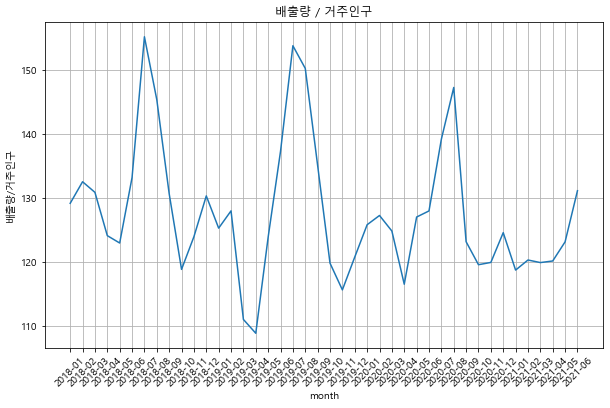

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(y='배출량/거주인구', x='month', data=pop_in)
plt.xticks(rotation=45)
plt.grid()
plt.title('배출량 / 거주인구')
plt.show()

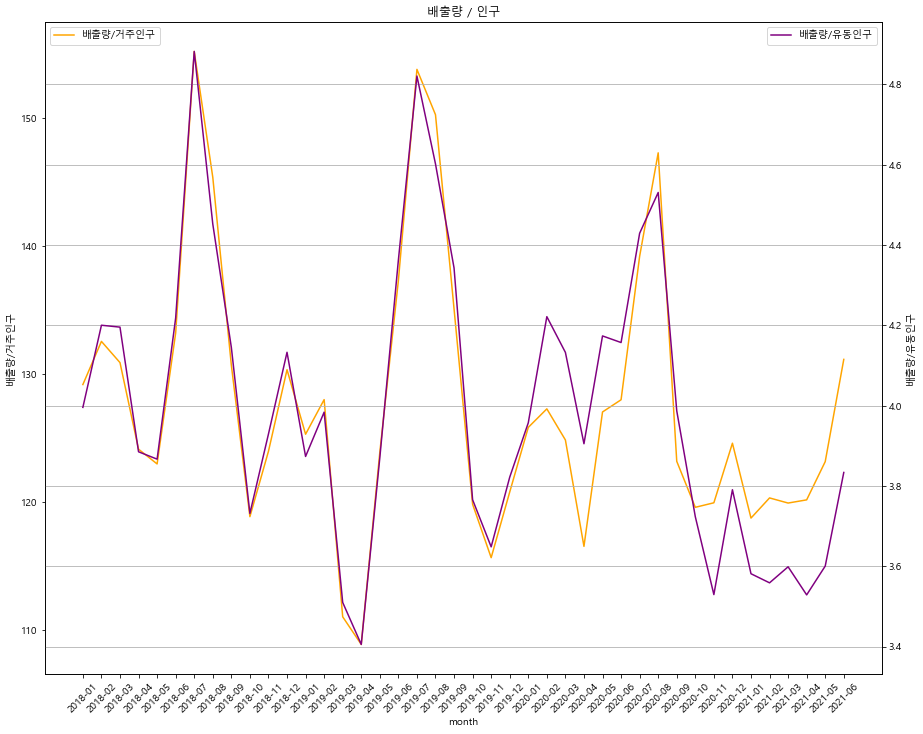

In [43]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.lineplot(y='배출량/거주인구', x='month', data=pop_in, color='orange', ax=ax)
ax.set_xticklabels(pop_in['month'].unique(), rotation=45)
ax.legend(['배출량/거주인구'], loc='upper left')

ax2 = plt.twinx()
sns.lineplot(y='배출량/유동인구', x='month', data=pop_in, color='purple', ax=ax2)
ax2.set_xticklabels(pop_in['month'].unique(), rotation=45)
ax2.legend(['배출량/유동인구'])

plt.grid()
plt.title('배출량 / 인구')
plt.show()